Code to create fake news Facebook posts bar plot in summarize_single_var lecture. Uses [Buzzfeed News data](https://github.com/BuzzFeedNews/2018-12-fake-news-top-50), slightly cleaned and saved in this course github. 

In [1]:
import pandas as pd
# not used in course directly. used just to save the figure here
import matplotlib.pyplot as plt 

In [2]:
fb = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/fakebook_buzzfeed_2018.csv')

In [3]:
fb.head()

,title,url,fb_engagement,published_date,category,source
0,"Lottery winner arrested for dumping $200,000 o...",https://worldnewsdailyreport.com/lottery-winne...,2383021.0,2018-05-13,Crime,NaN
1,Former first lady Barbara Bush dies at 92 - CNN,http://breaking-cnn.com/former-first-lady-barb...,2290000.0,2018-04-16,Politics,Trendolizer
2,Woman sues Samsung for $1.8M after cell phone ...,https://worldnewsdailyreport.com/woman-sues-sa...,1304430.0,2018-09-19,Medical,NaN
3,BREAKING: Michael Jordan Resigns From The Boar...,https://trumpbetrayed.us/all/breaking-michael-...,911336.0,2018-09-05,Business,NaN
4,Donald Trump Ends School Shootings By Banning ...,https://www.8shit.net/donald-trump-ends-school...,830116.0,2018-02-23,Politics,NaN


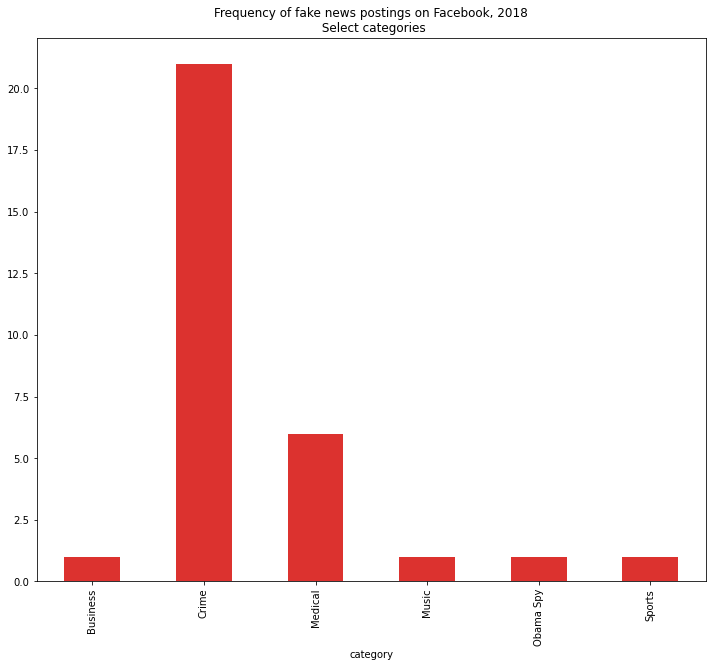

In [4]:
# too many small categories. focus on these
# "Obama Spy", "Crime", "Medical", "Business", "Sports", "Music"
fb.query('category in ["Obama Spy", "Crime", "Medical", "Business", "Sports", "Music"]'
        ).groupby('category'
                 ).count().title.plot(kind = 'bar', color = '#dc322f', figsize = (12, 10), 
                                      title = 'Frequency of fake news postings on Facebook, 2018\n Select categories')

plt.savefig('fakebook_select_cat.jpeg', dpi = 350)

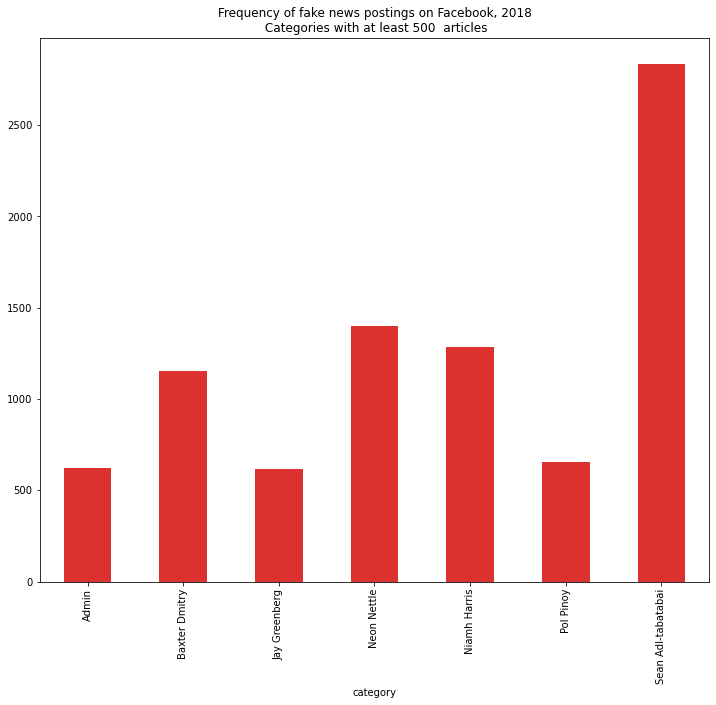

In [5]:
# and now just those with at least 500 postings
fb.groupby('category').count().query('title > 500').title.plot(kind = 'bar', color = '#dc322f', figsize = (12, 10), 
                                      title = 'Frequency of fake news postings on Facebook, 2018\n Categories with at least 500  articles')

plt.savefig('fakebook_over500_cat.jpeg', dpi = 350)